# <b><span style='color:#F1A424'>AutoML - Binary Classification - Breast Cancer Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Breast Cancer Dataset**

**Features**:

- `ID number`
-  `Diagnosis` : (M = malignant, B = benign)

- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

- The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

- All feature values are recoded with four significant digits.

- Missing attribute values: none


**Target Variable**:

- `diagnosis`: 357 benign, 212 malignant

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of cancer i.e., benign and malignant.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.



In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','breast_cancer')

In [5]:
# Fetching in teradata dataframe
cancer_df = DataFrame("breast_cancer")

In [6]:
# first 5 rows
cancer_df.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [7]:
# cancer_df dataset
cancer_df.shape

(569, 32)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
cancer_df_sample = cancer_df.sample(frac = [0.8, 0.2])

In [9]:
cancer_df_sample.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,sampleid
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472,2
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179,1
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368,1
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376,2
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486,1
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082,1
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789,2
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834,1
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,1


In [10]:
# Fetching train and test data
cancer_df_train= cancer_df_sample[cancer_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
cancer_df_test = cancer_df_sample[cancer_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
cancer_df_train.shape

(455, 32)

In [12]:
# test data shape
cancer_df_test.shape

(114, 32)

In [13]:
#train dataset
cancer_df_train.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86561,B,13.85,17.21,88.44,588.7,0.08785,0.06136,0.0142,0.01141,0.1614,0.0589,0.2185,0.8561,1.495,17.91,0.004599,0.009169,0.009127,0.004814,0.01247,0.001708,15.49,23.58,100.3,725.9,0.1157,0.135,0.08115,0.05104,0.2364,0.07182
87163,M,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,0.4697,1.147,3.142,43.4,0.006003,0.01063,0.02151,0.009443,0.0152,0.001868,17.98,29.87,116.6,993.6,0.1401,0.1546,0.2644,0.116,0.2884,0.07371
86517,M,18.66,17.12,121.4,1077.0,0.1054,0.11,0.1457,0.08665,0.1966,0.06213,0.7128,1.581,4.895,90.47,0.008102,0.02101,0.03342,0.01601,0.02045,0.00457,22.25,24.9,145.4,1549.0,0.1503,0.2291,0.3272,0.1674,0.2894,0.08456
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [14]:
# test dataset
cancer_df_test.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
87127,B,10.8,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.064,0.1728,0.4064,1.126,11.48,0.007809,0.009816,0.01099,0.005344,0.01254,0.00212,11.6,12.02,73.66,414.0,0.1436,0.1257,0.1047,0.04603,0.209,0.07699
89122,M,19.4,18.18,127.2,1145.0,0.1037,0.1442,0.1626,0.09464,0.1893,0.05892,0.4709,0.9951,2.903,53.16,0.005654,0.02199,0.03059,0.01499,0.01623,0.001965,23.79,28.65,152.4,1628.0,0.1518,0.3749,0.4316,0.2252,0.359,0.07787
89344,B,13.2,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,0.1903,0.5735,1.204,15.5,0.003632,0.007861,0.001128,0.002386,0.01344,0.002585,14.41,20.45,92.0,636.9,0.1128,0.1346,0.0112,0.025,0.2651,0.08385
851509,M,21.16,23.04,137.2,1404.0,0.09428,0.1022,0.1097,0.08632,0.1769,0.05278,0.6917,1.127,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.26,0.3155,0.2009,0.2822,0.07526
853401,M,18.63,25.11,124.8,1088.0,0.1064,0.1887,0.2319,0.1244,0.2183,0.06197,0.8307,1.466,5.574,105.0,0.006248,0.03374,0.05196,0.01158,0.02007,0.00456,23.15,34.01,160.5,1670.0,0.1491,0.4257,0.6133,0.1848,0.3444,0.09782
90291,M,14.6,23.29,93.97,664.7,0.08682,0.06636,0.0839,0.05271,0.1627,0.05416,0.4157,1.627,2.914,33.01,0.008312,0.01742,0.03389,0.01576,0.0174,0.002871,15.79,31.71,102.2,758.2,0.1312,0.1581,0.2675,0.1359,0.2477,0.06836
87106,B,11.15,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,0.183,0.06105,0.2251,0.7815,1.429,15.48,0.009019,0.008985,0.01196,0.008232,0.02388,0.001619,11.99,16.3,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping timer threshold to 100 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(max_runtime_secs=100,
                     max_models=5,
                     verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 455
Total Columns in the data: 32

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
area_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
concavity_se,FLOAT,455,0,None,10,445,0,0.0,100.0
symmetry_se,FLOAT,455,0,None,0,455,0,0.0,100.0
area_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
perimeter_se,FLOAT,455,0,None,0,455,0,0.0,100.0
concave_points_se,FLOAT,455,0,None,10,445,0,0.0,100.0
fractal_dimension_se,FLOAT,455,0,None,0,455,0,0.0,100.0
symmetry_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
concave_points_mean,FLOAT,455,0,None,10,445,0,0.0,100.0
fractal_dimension_mean,FLOAT,455,0,None,0,455,0,0.0,100.0


                 id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave_points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  symmetry_worst  fractal_dimension_worst
func                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

func,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
min,8670,7.691,10.38,47.92,170.4,0.053,0.019,0,0,0.106,0.05,0.115,0.362,0.757,6.802,0.003,0.002,0,0,0.008,0.001,8.678,14.82,54.49,223.6,0.081,0.034,0,0,0.157,0.055
std,112779785.022,3.436,4.238,23.713,340.118,0.014,0.054,0.079,0.038,0.028,0.007,0.269,0.536,1.968,42.27,0.003,0.018,0.031,0.006,0.008,0.003,4.728,5.986,32.97,551.561,0.023,0.162,0.212,0.066,0.06,0.018
25%,869221,11.74,16.17,75.265,423.25,0.085,0.063,0.028,0.02,0.162,0.058,0.235,0.843,1.653,17.965,0.005,0.013,0.015,0.008,0.015,0.002,13.055,21.25,84.135,516.15,0.115,0.142,0.11,0.064,0.248,0.071
50%,906290,13.21,18.75,85.69,538.9,0.095,0.092,0.059,0.033,0.178,0.061,0.324,1.108,2.281,24.19,0.006,0.02,0.026,0.011,0.019,0.003,14.85,25.4,97.11,677.3,0.13,0.21,0.221,0.098,0.282,0.08
75%,8836915.5,15.515,21.6,102.8,753.75,0.105,0.13,0.123,0.071,0.196,0.066,0.476,1.475,3.377,43.815,0.008,0.032,0.042,0.015,0.023,0.005,18.36,29.18,124.05,1031.5,0.146,0.338,0.379,0.159,0.316,0.092
max,911320501,28.11,39.28,188.5,2499,0.163,0.345,0.427,0.201,0.304,0.096,2.873,3.896,21.98,525.6,0.023,0.135,0.396,0.053,0.079,0.03,33.13,49.54,229.3,3432,0.223,1.058,1.252,0.29,0.577,0.208
mean,27244224.255,14.036,19.254,91.357,645.041,0.096,0.104,0.087,0.048,0.181,0.063,0.403,1.216,2.854,39.702,0.007,0.026,0.032,0.012,0.02,0.004,16.156,25.609,106.56,867.145,0.131,0.254,0.269,0.113,0.289,0.084
count,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
diagnosis                 2         

No Futile columns found.

Target Column Distribution:


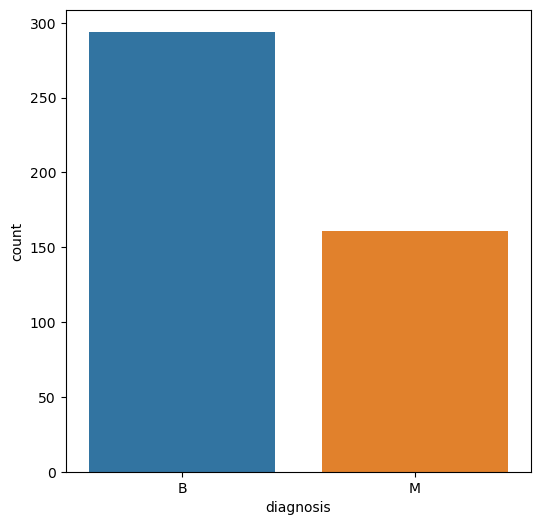

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
               ColumnName  OutlierPercentage
0               area_mean           7.252747
1              texture_se           3.736264
2          symmetry_worst           3.736264
3             radius_mean           3.296703
4        compactness_mean           2.857143
5          perimeter_mean           2.637363
6                 area_se          11.428571
7             symmetry_se           4.175824
8                      id          14.285714
9  fractal_dimension_mean           2.637363


Analysis completed. No action taken.                                                    


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
                ColumnName  OutlierPercentage
0            texture_worst           1.538462
1                area_mean           7.252747
2                radius_se           7.252747
3             perimeter_se           6.813187
4          smoothness_mean           1.098901
5     fractal_dimension_se           5.054945
6         smoothness_worst           0.659341
7               area_worst           8.131868
8         compactness_mean           2.857143
9  fractal_dimension_worst           4.

['radius_se', 'compactness_mean', 'symmetry_worst', 'smoothness_worst', 'compactness_worst', 'smoothness_mean', 'radius_mean', 'texture_worst', 'perimeter_se', 'fractal_dimension_worst', 'smoothness_se', 'fractal_dimension_se', 'area_mean', 'radius_worst', 'concavity_worst', 'concave_points_mean', 'symmetry_mean', 'symmetry_se', 'fractal_dimension_mean', 'concave_points_se', 'concavity_se', 'perimeter_mean', 'texture_se', 'perimeter_worst', 'compactness_se', 'texture_mean', 'concavity_mean']


radius_mean,radius_se,perimeter_se,smoothness_mean,symmetry_worst,concave_points_worst,compactness_worst,smoothness_se,symmetry_se,compactness_mean,area_mean,fractal_dimension_worst,id,radius_worst,smoothness_worst,symmetry_mean,perimeter_mean,fractal_dimension_mean,texture_se,area_worst,area_se,concave_points_mean,concavity_worst,perimeter_worst,compactness_se,texture_mean,concavity_mean,concave_points_se,fractal_dimension_se,texture_worst,concavity_se,diagnosis
9.683,0.2957,2.054,0.08491,0.2552,0.03846,0.09546,0.00744,0.02203,0.0503,285.7,0.0792,414,10.93,0.1199,0.158,61.05,0.06235,1.363,364.2,18.24,0.009615,0.0935,69.1,0.01123,19.34,0.02337,0.009615,0.004154,25.59,0.02337,0
15.49,0.647,4.675,0.116,0.3187,0.2121,0.3913,0.007269,0.01852,0.1562,744.7,0.1019,422,21.2,0.1681,0.1929,102.4,0.06744,1.331,1359.0,66.91,0.09113,0.5553,142.1,0.02928,19.97,0.1891,0.01639,0.004232,29.41,0.04972,1
11.41,0.3344,1.902,0.09059,0.1811,0.06296,0.161,0.007356,0.02165,0.08155,402.0,0.07427,179,12.37,0.1121,0.1167,73.53,0.06217,1.108,467.2,22.77,0.02361,0.1648,79.12,0.03728,14.92,0.06181,0.01712,0.004784,17.7,0.05915,0
11.41,0.1408,1.103,0.09373,0.3016,0.08958,0.239,0.00604,0.01344,0.06685,403.3,0.08523,312,12.82,0.1548,0.1667,73.34,0.06113,0.4607,510.5,10.5,0.02623,0.2102,83.74,0.01529,10.82,0.03512,0.00646,0.002206,15.97,0.01514,0
13.28,0.3704,2.427,0.1041,0.3739,0.1492,0.3724,0.005072,0.01719,0.1436,545.2,0.1027,280,17.38,0.153,0.1974,87.32,0.06782,0.8249,907.2,31.33,0.06158,0.3664,113.1,0.02147,20.28,0.09847,0.00956,0.003317,28.0,0.02185,1
13.28,0.1833,1.592,0.08363,0.2736,0.09173,0.2685,0.004271,0.01461,0.08575,541.8,0.0732,77,14.24,0.1166,0.1617,85.79,0.05594,0.5308,623.7,15.26,0.02864,0.2866,96.59,0.02073,13.72,0.05077,0.008468,0.002613,17.37,0.02828,0
19.79,0.4953,2.765,0.1015,0.3305,0.1732,0.3861,0.005033,0.01578,0.1589,1192.0,0.08465,294,22.63,0.1275,0.2202,130.4,0.06113,1.199,1589.0,63.33,0.1149,0.5673,148.7,0.03179,25.12,0.2545,0.01043,0.003224,33.58,0.04755,1
14.29,0.1302,0.8439,0.06429,0.2458,0.03333,0.05036,0.003492,0.01536,0.02675,632.6,0.0612,55,14.91,0.08567,0.1508,90.3,0.05376,0.7198,684.6,10.77,0.00625,0.03866,94.44,0.00371,16.82,0.00725,0.003608,0.001381,20.65,0.004826,0
9.0,0.1746,1.144,0.07005,0.2991,0.01389,0.05232,0.007389,0.02701,0.03116,246.3,0.07804,104,9.699,0.09861,0.1788,56.36,0.06833,1.305,285.5,9.789,0.003472,0.01472,60.9,0.004883,14.4,0.003681,0.003472,0.002153,20.07,0.003681,0
7.729,0.3777,2.492,0.08098,0.3058,0.0,0.0834,0.01266,0.02882,0.04878,178.8,0.09938,191,9.077,0.1256,0.187,47.98,0.07285,1.462,248.0,19.14,0.0,0.0,57.17,0.009692,25.49,0.0,0.0,0.006872,30.92,0.0,0


['area_worst', 'area_se']


radius_mean,radius_se,perimeter_se,smoothness_mean,symmetry_worst,concave_points_worst,compactness_worst,smoothness_se,symmetry_se,compactness_mean,area_mean,fractal_dimension_worst,id,radius_worst,smoothness_worst,symmetry_mean,perimeter_mean,fractal_dimension_mean,texture_se,area_worst,area_se,concave_points_mean,concavity_worst,perimeter_worst,compactness_se,texture_mean,concavity_mean,concave_points_se,fractal_dimension_se,texture_worst,concavity_se,diagnosis
11.47,0.1707,1.09,0.09076,0.2851,0.06548,0.112,0.009191,0.01755,0.05886,402.7,0.08763,232,12.51,0.1531,0.1634,73.02,0.06372,0.7615,475.8,12.25,0.02322,0.09823,79.67,0.008548,16.03,0.02587,0.006315,0.003009,20.79,0.0094,0
12.43,0.3778,2.487,0.07557,0.1901,0.02832,0.04712,0.007357,0.03433,0.03454,477.3,0.05932,406,12.9,0.08409,0.1472,78.6,0.05561,2.2,515.9,31.16,0.01699,0.02237,81.76,0.01079,17.0,0.01342,0.0112,0.002961,20.21,0.009959,0
14.76,0.3428,2.537,0.08875,0.3109,0.1251,0.2009,0.004732,0.02163,0.0778,668.7,0.08187,408,17.27,0.122,0.1521,94.87,0.05912,0.3981,880.8,29.06,0.03528,0.2151,114.2,0.01506,14.74,0.04608,0.01067,0.002783,17.93,0.01855,0
11.81,0.1859,1.011,0.1007,0.32,0.04306,0.1,0.007831,0.03139,0.05562,428.9,0.06576,258,12.57,0.1356,0.1718,75.27,0.0578,1.926,489.5,14.47,0.01553,0.08803,79.57,0.008776,17.39,0.02353,0.00624,0.001988,26.48,0.01556,0
12.76,0.2213,1.535,0.09676,0.2744,0.08312,0.1839,0.005608,0.01909,0.07952,496.6,0.07238,242,13.75,0.1298,0.1759,81.87,0.06183,1.285,579.7,17.26,0.01781,0.1255,87.82,0.01646,18.84,0.02688,0.009997,0.002133,25.99,0.01529,0
11.8,0.3438,2.225,0.09087,0.2779,0.05356,0.1726,0.005463,0.01477,0.06232,431.9,0.08121,58,13.45,0.1244,0.1847,75.26,0.06019,1.14,562.0,25.06,0.01638,0.1449,86.0,0.01964,17.26,0.02853,0.005398,0.003071,24.49,0.02079,0
14.68,0.4727,3.195,0.09867,0.3029,0.1609,0.1871,0.005718,0.0141,0.072,684.5,0.08216,278,19.07,0.1464,0.1586,94.74,0.05922,1.24,1138.0,45.4,0.05259,0.2914,123.4,0.01162,20.13,0.07395,0.01109,0.002085,30.88,0.01998,1
11.26,0.1344,0.9812,0.08511,0.2557,0.02832,0.07723,0.0042,0.01487,0.04413,388.1,0.07613,431,11.93,0.1108,0.1637,71.3,0.06343,1.083,435.9,9.332,0.005664,0.02533,76.38,0.0059,19.83,0.005067,0.004065,0.002295,26.43,0.003846,0
15.61,0.2298,1.534,0.0784,0.2683,0.08568,0.1807,0.002826,0.01013,0.05616,758.6,0.06829,405,17.91,0.1084,0.1547,100.0,0.05443,0.9988,988.6,22.18,0.02847,0.226,115.9,0.009105,19.38,0.04209,0.005174,0.001345,31.67,0.01311,1
10.48,0.3276,2.564,0.09816,0.302,0.0931,0.2996,0.007364,0.02161,0.1013,333.6,0.09646,172,12.13,0.1327,0.1925,67.49,0.06915,1.127,440.4,20.77,0.02218,0.2939,81.41,0.03867,14.98,0.06335,0.01264,0.00483,21.57,0.05263,0


['radius_mean', 'radius_se', 'perimeter_se', 'smoothness_mean', 'symmetry_worst', 'concave_points_worst', 'compactness_worst', 'smoothness_se', 'symmetry_se', 'compactness_mean', 'area_mean', 'fractal_dimension_worst', 'radius_worst', 'smoothness_worst', 'symmetry_mean', 'perimeter_mean', 'fractal_dimension_mean', 'texture_se', 'area_worst', 'area_se', 'concave_points_mean', 'concavity_worst', 'perimeter_worst', 'compactness_se', 'texture_mean', 'concavity_mean', 'concave_points_se', 'fractal_dimension_se', 'texture_worst', 'concavity_se']


['radius_mean', 'radius_se', 'perimeter_se', 'smoothness_mean', 'symmetry_worst', 'concave_points_worst', 'compactness_worst', 'smoothness_se', 'symmetry_se', 'compactness_mean', 'area_mean', 'fractal_dimension_worst', 'radius_worst', 'smoothness_worst', 'symmetry_mean', 'perimeter_mean', 'fractal_dimension_mean', 'texture_se', 'area_worst', 'area_se', 'concave_points_mean', 'concavity_worst', 'perimeter_worst', 'compactness_se', 'texture_mean', 'concavity_mean', 'concave_points_se', 'fractal_dimension_se', 'texture_worst', 'concavity_se']


diagnosis,id,radius_mean,radius_se,perimeter_se,smoothness_mean,symmetry_worst,concave_points_worst,compactness_worst,smoothness_se,symmetry_se,compactness_mean,area_mean,fractal_dimension_worst,radius_worst,smoothness_worst,symmetry_mean,perimeter_mean,fractal_dimension_mean,texture_se,area_worst,area_se,concave_points_mean,concavity_worst,perimeter_worst,compactness_se,texture_mean,concavity_mean,concave_points_se,fractal_dimension_se,texture_worst,concavity_se
1,2,0.4511234557665202,0.10927060133630288,0.12063558436127954,0.5474683544303798,0.8144989339019191,0.6613168724279836,0.6174787584532686,0.060606060606060594,0.04016064257028115,0.4666301969365427,0.34436633470025385,0.6278713629402756,0.41529492455418376,0.6647398843930635,0.4481424148606811,0.4542586750788643,0.42446043165467634,0.1263700186878125,0.47849875215972365,0.17414152396484553,0.41047693510555117,0.4824640869677753,0.40332137194358675,0.21455223880597016,0.5905427189682966,0.3245579567779961,0.33495145631067963,0.10447761194029849,0.5859253499222395,0.17769607843137256
1,4,0.4511234557665202,0.2391425389755011,0.2383441354798244,0.8433544303797468,0.902771855010661,0.8592592592592594,0.6629096584012485,0.37373737373737376,0.29317269076305214,0.5672866520787746,0.3473930872876391,0.9601837672281778,0.3832876085962505,0.9373795761079,0.7438080495356036,0.4610531424411551,0.6402877697841727,0.2684984090105561,0.49644845459781156,0.3952160913291655,0.5738858483189992,0.6478581596997541,0.3807894517232746,0.3936567164179105,0.42127888232133265,0.4817288801571709,0.587378640776699,0.38805970149253727,0.51049766718507,0.3553921568627451
0,5,0.6186054224359505,0.08769487750556791,0.12147187957348944,0.2705696202531646,0.30021321961620473,0.3366255144032922,0.24172013178428992,0.22222222222222227,0.2570281124497992,0.2729759299781182,0.520406170669791,0.19142419601837668,0.41358024691358014,0.3015414258188826,0.42879256965944273,0.6026449890803203,0.19424460431654664,0.025455831102580935,0.5537531196006912,0.24730452115611123,0.20797498045347926,0.17626504464863463,0.3949762163064341,0.23507462686567165,0.12842557764642668,0.13320235756385068,0.4466019417475728,0.11940298507462685,0.03538102643856921,0.18995098039215685
1,6,0.5083326424011275,0.19626948775055672,0.24587079238971357,0.6344936708860759,0.7876332622601279,0.6806584362139918,0.6982833362233397,0.32323232323232326,0.37349397590361444,0.7237417943107222,0.39064635813317705,0.776416539050536,0.3878600823045267,0.6233140655105973,0.726780185758514,0.5214753700558116,0.6906474820143885,0.42017273599676747,0.4875215972355539,0.35988040228322915,0.4378420641125879,0.5999741167335317,0.39414170074271887,0.5988805970149255,0.3283181085437936,0.3889980353634578,0.6941747572815534,0.5373134328358209,0.47083981337480557,0.4791666666666667
1,8,0.6874222701268552,0.36776169265033404,0.3573071294166841,0.31012658227848106,0.49680170575692967,0.41069958847736626,0.20946766082885382,0.12121212121212123,0.18072289156626503,0.2587527352297593,0.6043741456746728,0.44869831546707517,0.5844764517604023,0.35452793834296725,0.2794117647058823,0.6639165251152632,0.2517985611510792,0.41663720389918685,0.871376463812632,0.7635226963848871,0.2595777951524628,0.18881842888572536,0.5560377201034798,0.13059701492537312,0.6673831273508866,0.12966601178781925,0.36893203883495146,0.29850746268656714,0.7410575427682738,0.13480392156862744
0,9,0.2919326755658735,0.13794543429844097,0.16140497595651263,0.32594936708860744,0.44008528784648177,0.06872427983539095,0.11028264262181378,0.2828282828282829,0.27710843373493976,0.13785557986870897,0.2062097246631517,0.2909647779479327,0.21696387745770457,0.34007707129094417,0.46904024767801866,0.2839116719242901,0.38848920863309355,0.3202181928380221,0.24044922249952008,0.1872791519434629,0.02267396403440187,0.007117898278762779,0.20787782692147205,0.08955223880597017,0.21278882321332612,0.003929273084479371,0.1407766990291262,0.14925373134328357,0.2814930015552099,0.012254901960784314
0,7,0.491

['radius_mean', 'radius_se', 'perimeter_se', 'smoothness_mean', 'symmetry_worst', 'concave_points_worst', 'compactness_worst', 'smoothness_se', 'compactness_mean', 'area_mean', 'radius_worst', 'smoothness_worst', 'symmetry_mean', 'perimeter_mean', 'fractal_dimension_mean', 'texture_se', 'area_worst', 'area_se', 'concave_points_mean', 'concavity_worst', 'perimeter_worst', 'compactness_se', 'texture_mean', 'concavity_mean', 'concave_points_se', 'fractal_dimension_se', 'texture_worst', 'concavity_se']


['r_radius_mean', 'r_radius_se', 'r_perimeter_se', 'r_smoothness_mean', 'r_symmetry_worst', 'r_concave_points_worst', 'r_compactness_worst', 'r_smoothness_se', 'r_compactness_mean', 'r_area_mean', 'r_radius_worst', 'r_smoothness_worst', 'r_symmetry_mean', 'r_perimeter_mean', 'r_fractal_dimension_mean', 'r_texture_se', 'r_area_worst', 'r_area_se', 'r_concave_points_mean', 'r_concavity_worst', 'r_perimeter_worst', 'r_compactness_se', 'r_texture_mean', 'r_concavity_mean', 'r_concave_points_se', 'r_fractal_dimension_se', 'r_texture_worst', 'r_concavity_se']


diagnosis,id,r_radius_mean,r_radius_se,r_perimeter_se,r_smoothness_mean,r_symmetry_worst,r_concave_points_worst,r_compactness_worst,r_smoothness_se,r_compactness_mean,r_area_mean,r_radius_worst,r_smoothness_worst,r_symmetry_mean,r_perimeter_mean,r_fractal_dimension_mean,r_texture_se,r_area_worst,r_area_se,r_concave_points_mean,r_concavity_worst,r_perimeter_worst,r_compactness_se,r_texture_mean,r_concavity_mean,r_concave_points_se,r_fractal_dimension_se,r_texture_worst,r_concavity_se
1,2,0.4511234557665202,0.10927060133630288,0.12063558436127954,0.5474683544303798,0.8144989339019191,0.6613168724279836,0.6174787584532686,0.060606060606060594,0.4666301969365427,0.34436633470025385,0.41529492455418376,0.6647398843930635,0.4481424148606811,0.4542586750788643,0.42446043165467634,0.1263700186878125,0.47849875215972365,0.17414152396484553,0.41047693510555117,0.4824640869677753,0.40332137194358675,0.21455223880597016,0.5905427189682966,0.3245579567779961,0.33495145631067963,0.10447761194029849,0.5859253499222395,0.17769607843137256
1,4,0.4511234557665202,0.2391425389755011,0.2383441354798244,0.8433544303797468,0.902771855010661,0.8592592592592594,0.6629096584012485,0.37373737373737376,0.5672866520787746,0.3473930872876391,0.3832876085962505,0.9373795761079,0.7438080495356036,0.4610531424411551,0.6402877697841727,0.2684984090105561,0.49644845459781156,0.3952160913291655,0.5738858483189992,0.6478581596997541,0.3807894517232746,0.3936567164179105,0.42127888232133265,0.4817288801571709,0.587378640776699,0.38805970149253727,0.51049766718507,0.3553921568627451
0,5,0.6186054224359505,0.08769487750556791,0.12147187957348944,0.2705696202531646,0.30021321961620473,0.3366255144032922,0.24172013178428992,0.22222222222222227,0.2729759299781182,0.520406170669791,0.41358024691358014,0.3015414258188826,0.42879256965944273,0.6026449890803203,0.19424460431654664,0.025455831102580935,0.5537531196006912,0.24730452115611123,0.20797498045347926,0.17626504464863463,0.3949762163064341,0.23507462686567165,0.12842557764642668,0.13320235756385068,0.4466019417475728,0.11940298507462685,0.03538102643856921,0.18995098039215685
1,6,0.5083326424011275,0.19626948775055672,0.24587079238971357,0.6344936708860759,0.7876332622601279,0.6806584362139918,0.6982833362233397,0.32323232323232326,0.7237417943107222,0.39064635813317705,0.3878600823045267,0.6233140655105973,0.726780185758514,0.5214753700558116,0.6906474820143885,0.42017273599676747,0.4875215972355539,0.35988040228322915,0.4378420641125879,0.5999741167335317,0.39414170074271887,0.5988805970149255,0.3283181085437936,0.3889980353634578,0.6941747572815534,0.5373134328358209,0.47083981337480557,0.4791666666666667
1,8,0.6874222701268552,0.36776169265033404,0.3573071294166841,0.31012658227848106,0.49680170575692967,0.41069958847736626,0.20946766082885382,0.12121212121212123,0.2587527352297593,0.6043741456746728,0.5844764517604023,0.35452793834296725,0.2794117647058823,0.6639165251152632,0.2517985611510792,0.41663720389918685,0.871376463812632,0.7635226963848871,0.2595777951524628,0.18881842888572536,0.5560377201034798,0.13059701492537312,0.6673831273508866,0.12966601178781925,0.36893203883495146,0.29850746268656714,0.7410575427682738,0.13480392156862744
0,9,0.2919326755658735,0.13794543429844097,0.16140497595651263,0.32594936708860744,0.44008528784648177,0.06872427983539095,0.11028264262181378,0.2828282828282829,0.13785557986870897,0.2062097246631517,0.21696387745770457,0.34007707129094417,0.46904024767801866,0.2839116719242901,0.38848920863309355,0.3202181928380221,0.24044922249952008,0.1872791519434629,0.02267396403440187,0.007117898278762779,0.20787782692147205,0.08955223880597017,0.21278882321332612,0.003929273084479371,0.1407766990291262,0.14925373134328357,0.2814930015552099,0.012254901960784314
0,7,0.49175026946356026,0.03466035634743874,0.07192138825005226,0.3196202531645569,0.6840085287846482,0.4337448559670782,0.47875845326859723,0.24242424242424243,0.3068927789934354,0.3923061901972271,0.31870141746684943,0.44

['radius_mean', 'radius_se', 'perimeter_se', 'smoothness_mean', 'symmetry_worst', 'concave_points_worst', 'compactness_worst', 'smoothness_se', 'symmetry_se', 'compactness_mean', 'area_mean', 'fractal_dimension_worst', 'radius_worst', 'smoothness_worst', 'symmetry_mean', 'perimeter_mean', 'fractal_dimension_mean', 'texture_se', 'area_worst', 'area_se', 'concave_points_mean', 'concavity_worst', 'perimeter_worst', 'compactness_se', 'texture_mean', 'concavity_mean', 'concave_points_se', 'fractal_dimension_se', 'texture_worst', 'concavity_se']


diagnosis,id,radius_mean,radius_se,perimeter_se,smoothness_mean,symmetry_worst,concave_points_worst,compactness_worst,smoothness_se,symmetry_se,compactness_mean,area_mean,fractal_dimension_worst,radius_worst,smoothness_worst,symmetry_mean,perimeter_mean,fractal_dimension_mean,texture_se,area_worst,area_se,concave_points_mean,concavity_worst,perimeter_worst,compactness_se,texture_mean,concavity_mean,concave_points_se,fractal_dimension_se,texture_worst,concavity_se
0,172,0.22809053975623914,0.2955178173719376,0.37779636211582684,0.5641715461307168,0.5275053304904052,0.3831275720164609,0.46001248526045635,0.46146023998373,0.46085909273384185,0.44809101848813043,0.15114235500878734,0.6317965997855722,0.18095564700502972,0.49542609532980275,0.586687306501548,0.23671438971123507,0.6888011486001437,0.3863326430627809,0.19024764830101748,0.31639032345746126,0.1734167318217357,0.38035460075061467,0.20228657264457978,0.6785794141760454,0.22353573347662548,0.24891944990176817,0.6141885325558795,0.5721743747050496,0.26244167962674964,0.6451336111792106
0,216,0.37235718431307524,0.09159242761692651,0.04781517875810161,0.745212850134515,0.39488272921108736,0.33283950617283947,0.3419227301102865,0.35041692088671955,0.12324367723805699,0.5241220872989826,0.2678187853934778,0.5081942104457038,0.23982624599908545,0.567645642753972,0.7407120743034056,0.3820674593545256,0.6812634601579326,0.21910197484721453,0.2621424457669418,0.1308779559662952,0.16935105551211882,0.457486734825935,0.23333055161478758,0.3675933517179697,0.49543256313809775,0.3212180746561886,0.48075801749271135,0.422192071731949,0.3635303265940903,0.48614856582495714
0,287,0.7106375922394496,0.1272271714922049,0.08132970938741373,0.502611172653901,0.22046908315565042,0.5584362139917695,0.17649302906291184,0.4645108806182633,0.13287836210357287,0.2611311672683514,0.6258543253270845,0.26175524582631343,0.4775948788294467,0.5214251324025035,0.42105263157894735,0.6881824799805871,0.2372577171572148,0.05480074751250064,0.6584757151084661,0.31412521518528586,0.35676309616888185,0.2519735990682024,0.43920554118334304,0.18219423119922487,0.2622246104245029,0.21713163064833005,0.69533527696793,0.23873289287399718,0.1143079315707621,0.30277028683500856
0,293,0.49506674405107365,0.1778953229398664,0.16872255906334935,0.5853774331381548,0.31343283582089565,0.3735390946502058,0.173891933134494,0.04260728086231443,0.10919309514251305,0.32923093753418664,0.3830306580745948,0.2204012865676213,0.3427069044352995,0.37217140105922014,0.43730650154798756,0.48264984227129337,0.3919597989949748,0.29501489974241124,0.4264734114033404,0.3134456827036332,0.2470680218921032,0.2254432509382684,0.32220645915046314,0.11056868152344042,0.3664696399785062,0.1787033398821218,0.4486394557823129,0.0846212836243511,0.338646967340591,0.20813924981613138
0,419,0.3789901334881022,0.09562917594654788,0.09241062094919507,0.32631745529355904,0.32878464818763337,0.16390946502057613,0.09745439411805508,0.514032946918853,0.37173825772782015,0.12383765452357512,0.2788517867603983,0.25823250114872104,0.25068587105624135,0.3943187289359654,0.2879256965944273,0.36277602523659297,0.3406317300789664,0.5908884287085207,0.289978882703014,0.1458276705626529,0.06673182173573103,0.046835770674259085,0.22832345823249603,0.11515241857345158,0.44062332079527133,0.030475442043222004,0.31690962099125364,0.18755899008966495,0.5303265940902022,0.08585437607256681
0,378,0.3789901334881022,0.17107461024498885,0.19443863683880408,0.2894445323627156,0.2980810234541578,0.19814814814814816,0.22660747728376227,0.32235102704901364,0.4062625451625853,0.2907231156328629,0.2781683264987307,0.1202328074743453,0.25068587105624135,0.27298988926336065,0.38699690402476766,0.3743023537976219,0.17157214644651828,0.23910298499924237,0.292282587828758,0.26089517078916374,0.1293197810789679,0.1841594409214443,0.24601518818325965,0.37020198255943954,0.2729715206878023,0.15104125736738705,0.31258503401360543,0.11426380368098159,0.18545878693623638,0.259499877420

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11']


response_column : diagnosis                                                                                                                           
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : diagnosis
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
-------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_2,pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,SVM_2,pca,0.984615,0.984615,0.984615,0.984615,0.990000,0.968750,0.978820,0.984923,0.984615,0.984445
2,3,GLM_2,pca,0.984615,0.984615,0.984615,0.984615,0.990000,0.968750,0.978820,0.984923,0.984615,0.984445
3,4,DECISIONFOREST_2,pca,0.969231,0.969231,0.969231,0.969231,0.958546,0.958546,0.958546,0.969231,0.969231,0.969231
4,5,XGBOOST_2,pca,0.969231,0.969231,0.969231,0.969231,0.958546,0.958546,0.958546,0.969231,0.969231,0.969231


In [16]:
# Fitting train data
aml.fit(cancer_df_train, cancer_df_train.diagnosis)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_2,pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,SVM_2,pca,0.984615,0.984615,0.984615,0.984615,0.990000,0.968750,0.978820,0.984923,0.984615,0.984445
2,3,GLM_2,pca,0.984615,0.984615,0.984615,0.984615,0.990000,0.968750,0.978820,0.984923,0.984615,0.984445
3,4,DECISIONFOREST_2,pca,0.969231,0.969231,0.969231,0.969231,0.958546,0.958546,0.958546,0.969231,0.969231,0.969231
4,5,XGBOOST_2,pca,0.969231,0.969231,0.969231,0.969231,0.958546,0.958546,0.958546,0.969231,0.969231,0.969231


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_2,pca,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [21]:
aml.model_hyperparameters(rank=1)

{'response_column': 'diagnosis',
 'name': 'knn',
 'model_type': 'Classification',
 'k': 3,
 'id_column': 'id',
 'voting_weight': 1.0,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0'],
 'max_models': 1}

In [22]:
aml.model_hyperparameters(rank=3)

{'response_column': 'diagnosis',
 'name': 'glm',
 'family': 'BINOMIAL',
 'lambda1': 0.001,
 'alpha': 0.85,
 'learning_rate': 'OPTIMAL',
 'initial_eta': 0.1,
 'momentum': 0.65,
 'iter_num_no_change': 5,
 'iter_max': 500,
 'batch_size': 150,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0'],
 'max_models': 1}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [19]:
# Generating prediction on test data
prediction = aml.predict(cancer_df_test, 2)

Data Transformation started ...


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,16.35,23.29,109.0,840.4,0.09742,0.1497,0.1811,0.08773,0.2175,0.06218,0.4312,1.022,2.972,45.5,0.005635,0.03917,0.06072,0.01656,0.03197,0.004085,19.38,31.03,129.3,1165.0,0.1415,0.4665,0.7087,0.2248,0.4824,0.09614
M,17.06,21.0,111.8,918.6,0.1119,0.1056,0.1508,0.09934,0.1727,0.06071,0.8161,2.129,6.076,87.17,0.006455,0.01797,0.04502,0.01744,0.01829,0.003733,20.99,33.15,143.2,1362.0,0.1449,0.2053,0.392,0.1827,0.2623,0.07599
B,12.0,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,0.2271,1.255,1.441,16.16,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,13.67,24.9,87.78,567.9,0.1377,0.2003,0.2267,0.07632,0.3379,0.07924
B,9.876,19.4,63.95,298.3,0.1005,0.09697,0.06154,0.03029,0.1945,0.06322,0.1803,1.222,1.528,11.77,0.009058,0.02196,0.03029,0.01112,0.01609,0.00357,10.76,26.83,72.22,361.2,0.1559,0.2302,0.2644,0.09749,0.2622,0.0849
M,17.19,22.07,111.6,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.0558,0.4203,0.7383,2.819,45.42,0.004493,0.01206,0.02048,0.009875,0.01144,0.001575,21.58,29.33,140.5,1436.0,0.1558,0.2567,0.3889,0.1984,0.3216,0.0757
B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,0.2204,1.006,1.471,19.98,0.003535,0.01393,0.018,0.006144,0.01254,0.001219,16.46,25.44,106.0,831.0,0.1142,0.207,0.2437,0.07828,0.2455,0.06596
M,14.54,27.54,96.73,658.8,0.1139,0.1595,0.1639,0.07364,0.2303,0.07077,0.37,1.033,2.879,32.55,0.005607,0.0424,0.04741,0.0109,0.01857,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.1341
M,14.45,20.22,94.49,642.7,0.09872,0.1206,0.118,0.0598,0.195,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.01597,0.02,0.007303,0.01522,0.001976,18.33,30.12,117.9,1044.0,0.1552,0.4056,0.4967,0.1838,0.4753,0.1013
B,9.738,11.97,61.24,288.5,0.0925,0.04102,0.0,0.0,0.1903,0.06422,0.1988,0.496,1.218,12.26,0.00604,0.005656,0.0,0.0,0.02277,0.00322,10.62,14.1,66.53,342.9,0.1234,0.07204,0.0,0.0,0.3105,0.08151
B,11.15,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,0.183,0.06105,0.2251,0.7815,1.429,15.48,0.009019,0.008985,0.01196,0.008232,0.02388,0.001619,11.99,16.3,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772


radius_mean,radius_se,perimeter_se,smoothness_mean,symmetry_worst,concave_points_worst,compactness_worst,smoothness_se,symmetry_se,compactness_mean,area_mean,fractal_dimension_worst,id,radius_worst,smoothness_worst,symmetry_mean,perimeter_mean,fractal_dimension_mean,texture_se,area_worst,area_se,concave_points_mean,concavity_worst,perimeter_worst,compactness_se,texture_mean,concavity_mean,concave_points_se,fractal_dimension_se,texture_worst,concavity_se,diagnosis
11.54,0.1312,1.107,0.08597,0.339,0.04715,0.1626,0.004124,0.02032,0.05969,409.1,0.07434,111,12.34,0.1092,0.1833,73.73,0.061,0.3602,467.8,9.438,0.008907,0.08324,81.23,0.0134,10.72,0.01367,0.004667,0.001952,12.87,0.01003,0
9.738,0.1988,1.218,0.0925,0.3105,0.0,0.07204,0.00604,0.02277,0.04102,288.5,0.08151,11,10.62,0.1234,0.1903,61.24,0.06422,0.496,342.9,12.26,0.0,0.0,66.53,0.005656,11.97,0.0,0.0,0.00322,14.1,0.0,0
19.53,0.7392,4.722,0.0842,0.2713,0.1625,0.4097,0.005539,0.01332,0.113,1223.0,0.07568,53,27.9,0.1408,0.1428,128.0,0.05313,1.321,2477.0,109.9,0.06637,0.3995,180.2,0.02644,32.47,0.1145,0.01078,0.002256,45.41,0.02664,1
19.02,0.5495,3.055,0.09029,0.3956,0.1956,0.3206,0.003872,0.01964,0.1206,1076.0,0.09288,90,24.56,0.1249,0.1953,122.0,0.05629,0.6636,1623.0,57.65,0.08271,0.5755,152.9,0.01842,24.59,0.1468,0.012,0.003337,30.41,0.0371,1
11.61,0.2456,1.667,0.1088,0.2787,0.1105,0.217,0.005884,0.01848,0.1168,408.2,0.07427,27,12.64,0.1415,0.1886,75.46,0.0632,0.7339,475.7,15.89,0.04497,0.2302,81.93,0.02005,16.02,0.07097,0.01304,0.001982,19.67,0.02631,0
23.29,0.5539,4.667,0.1141,0.3198,0.2733,0.4167,0.009327,0.02175,0.2084,1685.0,0.08762,61,25.12,0.1536,0.22,158.9,0.06229,1.56,1986.0,83.16,0.162,0.7892,177.0,0.05121,26.67,0.3523,0.02465,0.005195,32.68,0.08958,1
17.05,0.2959,2.153,0.1141,0.3109,0.2543,0.3934,0.005532,0.01177,0.1572,895.0,0.09061,54,19.59,0.1703,0.2131,113.4,0.06325,0.679,1189.0,31.98,0.109,0.5018,133.5,0.02008,19.08,0.191,0.01384,0.002336,24.89,0.03055,1
13.61,0.231,1.752,0.09258,0.347,0.1329,0.2884,0.004088,0.01323,0.07862,572.6,0.079,94,16.89,0.1471,0.1761,87.76,0.0613,1.005,848.7,19.83,0.03085,0.3796,113.2,0.01174,24.69,0.05285,0.00688,0.001465,35.64,0.01796,1
17.93,0.4212,2.765,0.08855,0.2504,0.1136,0.1806,0.005444,0.01419,0.07027,998.9,0.07948,42,20.92,0.1315,0.1538,115.2,0.0551,1.433,1320.0,45.81,0.04744,0.208,135.1,0.01169,24.48,0.05699,0.008522,0.002751,34.69,0.01622,1
11.36,0.1916,1.359,0.08858,0.2973,0.08698,0.1622,0.005391,0.01341,0.05313,399.8,0.07745,79,13.05,0.1453,0.1601,72.49,0.05913,1.555,521.3,13.66,0.021,0.1811,85.07,0.009947,17.57,0.02783,0.005872,0.001659,36.32,0.01163,0


id,radius_mean,radius_se,perimeter_se,smoothness_mean,symmetry_worst,concave_points_worst,compactness_worst,smoothness_se,symmetry_se,compactness_mean,area_mean,fractal_dimension_worst,radius_worst,smoothness_worst,symmetry_mean,perimeter_mean,fractal_dimension_mean,texture_se,area_worst,area_se,concave_points_mean,concavity_worst,perimeter_worst,compactness_se,texture_mean,concavity_mean,concave_points_se,fractal_dimension_se,texture_worst,concavity_se,diagnosis
10,17.19,0.4203,2.819,0.0973,0.3216,0.1984,0.2567,0.0045,0.0114,0.09,928.3,0.0757,21.58,0.1558,0.1867,111.6,0.0558,0.7383,1436.0,45.42,0.0653,0.3889,140.5,0.0121,22.07,0.0906,0.0099,0.0016,29.33,0.0205,1
81,19.89,0.5079,3.654,0.1037,0.2549,0.1613,0.3309,0.0051,0.0106,0.131,1214.0,0.0914,23.73,0.1417,0.1802,130.5,0.0619,0.8737,1646.0,59.7,0.0943,0.4185,160.5,0.023,20.26,0.1411,0.0118,0.0034,25.23,0.0305,1
53,19.53,0.7392,4.722,0.0842,0.2713,0.1625,0.4097,0.0055,0.0133,0.113,1223.0,0.0757,27.9,0.1408,0.1428,128.0,0.0531,1.321,2477.0,109.9,0.0664,0.3995,180.2,0.0264,32.47,0.1145,0.0108,0.0023,45.41,0.0266,1
41,15.28,0.2054,1.344,0.0906,0.3175,0.1226,0.3299,0.0033,0.0117,0.1052,710.6,0.0977,17.8,0.1301,0.1727,98.92,0.0632,0.4956,973.1,19.53,0.0326,0.363,113.8,0.014,22.41,0.0537,0.006,0.0026,28.03,0.0177,1
63,19.68,0.6226,5.173,0.098,0.4045,0.2255,0.3458,0.0048,0.0376,0.1339,1194.0,0.0792,22.75,0.1218,0.2082,129.9,0.0571,2.284,1540.0,67.66,0.1103,0.4734,157.6,0.0337,21.68,0.1863,0.0181,0.0033,34.66,0.0435,1
113,14.87,0.4266,2.989,0.1162,0.3585,0.2027,0.448,0.007,0.016,0.1649,682.5,0.1065,18.81,0.1878,0.2157,98.64,0.0677,0.9489,1095.0,41.18,0.0892,0.4704,127.1,0.0256,16.67,0.169,0.0127,0.0039,27.37,0.0301,1
91,10.57,0.1115,2.363,0.0907,0.2597,0.1465,0.3619,0.0085,0.0162,0.166,338.3,0.12,10.85,0.1143,0.2188,70.15,0.0845,1.231,351.9,7.228,0.0594,0.603,76.51,0.0764,20.22,0.228,0.0292,0.0122,22.82,0.1535,0
25,11.14,0.4222,3.33,0.0727,0.2576,0.0392,0.1256,0.0055,0.031,0.0606,384.6,0.0702,12.12,0.0886,0.169,71.24,0.0608,0.8092,453.5,28.84,0.0147,0.1201,79.62,0.0339,14.07,0.045,0.0147,0.0048,15.82,0.045,0
18,14.64,0.2204,1.471,0.0864,0.2455,0.0783,0.207,0.0035,0.0125,0.067,666.0,0.066,16.46,0.1142,0.1409,94.21,0.0536,1.006,831.0,19.98,0.0279,0.2437,106.0,0.0139,16.85,0.0519,0.0061,0.0012,25.44,0.018,0
103,13.21,0.2084,1.314,0.0879,0.2444,0.06,0.1063,0.0058,0.0135,0.052,537.9,0.0679,14.35,0.1289,0.1619,84.1,0.0558,1.35,632.9,17.58,0.0207,0.139,91.29,0.0081,25.25,0.0277,0.0065,0.0018,34.23,0.0151,0


diagnosis,id,radius_mean,radius_se,perimeter_se,smoothness_mean,symmetry_worst,concave_points_worst,compactness_worst,smoothness_se,symmetry_se,compactness_mean,area_mean,fractal_dimension_worst,radius_worst,smoothness_worst,symmetry_mean,perimeter_mean,fractal_dimension_mean,texture_se,area_worst,area_se,concave_points_mean,concavity_worst,perimeter_worst,compactness_se,texture_mean,concavity_mean,concave_points_se,fractal_dimension_se,texture_worst,concavity_se
0,18,0.5730038968576404,0.14629732739420936,0.14927869537946895,0.37816455696202533,0.2865671641791045,0.3222222222222222,0.2994624588174094,0.07070707070707072,0.09638554216867472,0.2603938730853392,0.4756883421206795,0.16539050535987757,0.4284407864654778,0.31695568400770713,0.18730650154798759,0.560907546711963,0.12949640287769784,0.32521844537602906,0.565175657515838,0.2984959681072755,0.2181391712275215,0.3153876019153617,0.4074939497621631,0.2164179104477612,0.324019344438474,0.20392927308447936,0.29611650485436897,0.029850746268656695,0.4129082426127528,0.2205882352941176
0,49,0.4536108117071552,0.10439866369710467,0.09345598996445743,0.35759493670886067,0.37014925373134333,0.102880658436214,0.1739205826252818,0.08080808080808081,0.13253012048192772,0.1810722100656455,0.3500292911540714,0.43797856049004597,0.3112711476909007,0.3034682080924856,0.35990712074303416,0.4378791555447706,0.32014388489208634,0.10677306934693671,0.37886350547129966,0.19701911751381715,0.025801407349491788,0.01449462922220784,0.2906617708420262,0.10447761194029853,0.2686727565824825,0.005893909626719057,0.11650485436893203,0.2388059701492537,0.21889580093312594,0.013480392156862746
0,68,0.6633778293673825,0.06639755011135857,0.08070248797825633,0.6613924050632911,0.33006396588486137,0.5975308641975309,0.4570834055834923,0.32323232323232326,0.0682730923694779,0.6044857768052516,0.5549697324741262,0.40735068912710565,0.45987654320987653,0.7013487475915221,0.4775541795665635,0.6651298228585294,0.45323741007194257,0.01262690034850246,0.5875407947782684,0.16009785267735796,0.48553557466770914,0.5181829946939303,0.4617374614036552,0.29664179104477617,0.024717893605588345,0.4679764243614931,0.5194174757281553,0.19402985074626863,-0.024105754276827412,0.409313725490196
0,67,0.1556255700190697,0.09618596881959912,0.1404975956512649,0.3528481012658228,0.5113006396588488,0.33415637860082303,0.5328593722906191,0.32323232323232326,0.29718875502008035,0.39879649890590807,0.0992970123022847,0.6600306278713629,0.10208047553726562,0.40462427745664753,0.6726006191950464,0.1657364717301626,0.7625899280575541,0.29334814889640887,0.10693031291994629,0.1193259037782006,0.17904612978889756,0.5617962986928949,0.11749979137110905,0.6044776119402986,0.32348199892530893,0.33084479371316305,0.412621359223301,0.44776119402985076,0.32076205287713844,0.6164215686274509
0,123,0.5008705745792222,0.14448775055679286,0.15095128580388878,0.4667721518987341,0.44349680170575695,0.23868312757201648,0.12640887809953183,0.15151515151515152,0.4578313253012047,0.23413566739606126,0.39435657098223004,0.1944869831546708,0.3261316872427983,0.3439306358381504,0.3289473684210527,0.48628973550109195,0.3273381294964029,0.16793777463508258,0.4020925321558841,0.2477575428105463,0.15011727912431586,0.048272291963245756,0.3087707585746474,0.11007462686567167,0.1316496507254164,0.04165029469548134,0.33009708737864074,0.11940298507462685,0.08203732503888023,0.05269607843137254
0,116,0.5531050493325596,0.16174832962138086,0.2028015889609032,0.11708860759493676,0.23965884861407247,0.2288065843621399,0.19368822611409744,0.2626262626262627,0.16064257028112447,0.17943107221006566,0.4562585432532708,0.14395099540581938,0.36785550983081844,0.1965317919075145,0.4179566563467491,0.5371269109439456,0.15467625899280574,0.2773372392545078,0.4726435016317912,0.31072755277702274,0.13604378420641122,0.1905008412061602,0.36076107819410835,0.2705223880597015,0.8688876947877484,0.1367387033398821,0.31067961165048547,0.13432835820895522,0.6671850699844479,0.24

id,radius_mean,radius_se,perimeter_se,smoothness_mean,symmetry_worst,concave_points_worst,compactness_worst,smoothness_se,compactness_mean,area_mean,radius_worst,smoothness_worst,symmetry_mean,perimeter_mean,fractal_dimension_mean,texture_se,area_worst,area_se,concave_points_mean,concavity_worst,perimeter_worst,compactness_se,texture_mean,concavity_mean,concave_points_se,fractal_dimension_se,texture_worst,concavity_se,diagnosis
10,17.19,0.4203,2.819,0.0973,0.3216,0.1984,0.2567,0.0045,0.09,928.3,21.58,0.1558,0.1867,111.6,0.0558,0.7383,1436.0,45.42,0.0653,0.3889,140.5,0.0121,22.07,0.0906,0.0099,0.0016,29.33,0.0205,1
81,19.89,0.5079,3.654,0.1037,0.2549,0.1613,0.3309,0.0051,0.131,1214.0,23.73,0.1417,0.1802,130.5,0.0619,0.8737,1646.0,59.7,0.0943,0.4185,160.5,0.023,20.26,0.1411,0.0118,0.0034,25.23,0.0305,1
53,19.53,0.7392,4.722,0.0842,0.2713,0.1625,0.4097,0.0055,0.113,1223.0,27.9,0.1408,0.1428,128.0,0.0531,1.321,2477.0,109.9,0.0664,0.3995,180.2,0.0264,32.47,0.1145,0.0108,0.0023,45.41,0.0266,1
41,15.28,0.2054,1.344,0.0906,0.3175,0.1226,0.3299,0.0033,0.1052,710.6,17.8,0.1301,0.1727,98.92,0.0632,0.4956,973.1,19.53,0.0326,0.363,113.8,0.014,22.41,0.0537,0.006,0.0026,28.03,0.0177,1
63,19.68,0.6226,5.173,0.098,0.4045,0.2255,0.3458,0.0048,0.1339,1194.0,22.75,0.1218,0.2082,129.9,0.0571,2.284,1540.0,67.66,0.1103,0.4734,157.6,0.0337,21.68,0.1863,0.0181,0.0033,34.66,0.0435,1
113,14.87,0.4266,2.989,0.1162,0.3585,0.2027,0.448,0.007,0.1649,682.5,18.81,0.1878,0.2157,98.64,0.0677,0.9489,1095.0,41.18,0.0892,0.4704,127.1,0.0256,16.67,0.169,0.0127,0.0039,27.37,0.0301,1
91,10.57,0.1115,2.363,0.0907,0.2597,0.1465,0.3619,0.0085,0.166,338.3,10.85,0.1143,0.2188,70.15,0.0845,1.231,351.9,7.228,0.0594,0.603,76.51,0.0764,20.22,0.228,0.0292,0.0122,22.82,0.1535,0
25,11.14,0.4222,3.33,0.0727,0.2576,0.0392,0.1256,0.0055,0.0606,384.6,12.12,0.0886,0.169,71.24,0.0608,0.8092,453.5,28.84,0.0147,0.1201,79.62,0.0339,14.07,0.045,0.0147,0.0048,15.82,0.045,0
18,14.64,0.2204,1.471,0.0864,0.2455,0.0783,0.207,0.0035,0.067,666.0,16.46,0.1142,0.1409,94.21,0.0536,1.006,831.0,19.98,0.0279,0.2437,106.0,0.0139,16.85,0.0519,0.0061,0.0012,25.44,0.018,0
103,13.21,0.2084,1.314,0.0879,0.2444,0.06,0.1063,0.0058,0.052,537.9,14.35,0.1289,0.1619,84.1,0.0558,1.35,632.9,17.58,0.0207,0.139,91.29,0.0081,25.25,0.0277,0.0065,0.0018,34.23,0.0151,0


diagnosis,id,r_radius_mean,r_radius_se,r_perimeter_se,r_smoothness_mean,r_symmetry_worst,r_concave_points_worst,r_compactness_worst,r_smoothness_se,r_compactness_mean,r_area_mean,r_radius_worst,r_smoothness_worst,r_symmetry_mean,r_perimeter_mean,r_fractal_dimension_mean,r_texture_se,r_area_worst,r_area_se,r_concave_points_mean,r_concavity_worst,r_perimeter_worst,r_compactness_se,r_texture_mean,r_concavity_mean,r_concave_points_se,r_fractal_dimension_se,r_texture_worst,r_concavity_se
0,18,0.5730038968576404,0.14629732739420936,0.14927869537946895,0.37816455696202533,0.2865671641791045,0.3222222222222222,0.2994624588174094,0.07070707070707072,0.2603938730853392,0.4756883421206795,0.4284407864654778,0.31695568400770713,0.18730650154798759,0.560907546711963,0.12949640287769784,0.32521844537602906,0.565175657515838,0.2984959681072755,0.2181391712275215,0.3153876019153617,0.4074939497621631,0.2164179104477612,0.324019344438474,0.20392927308447936,0.29611650485436897,0.029850746268656695,0.4129082426127528,0.2205882352941176
0,49,0.4536108117071552,0.10439866369710467,0.09345598996445743,0.35759493670886067,0.37014925373134333,0.102880658436214,0.1739205826252818,0.08080808080808081,0.1810722100656455,0.3500292911540714,0.3112711476909007,0.3034682080924856,0.35990712074303416,0.4378791555447706,0.32014388489208634,0.10677306934693671,0.37886350547129966,0.19701911751381715,0.025801407349491788,0.01449462922220784,0.2906617708420262,0.10447761194029853,0.2686727565824825,0.005893909626719057,0.11650485436893203,0.2388059701492537,0.21889580093312594,0.013480392156862746
0,68,0.6633778293673825,0.06639755011135857,0.08070248797825633,0.6613924050632911,0.33006396588486137,0.5975308641975309,0.4570834055834923,0.32323232323232326,0.6044857768052516,0.5549697324741262,0.45987654320987653,0.7013487475915221,0.4775541795665635,0.6651298228585294,0.45323741007194257,0.01262690034850246,0.5875407947782684,0.16009785267735796,0.48553557466770914,0.5181829946939303,0.4617374614036552,0.29664179104477617,0.024717893605588345,0.4679764243614931,0.5194174757281553,0.19402985074626863,-0.024105754276827412,0.409313725490196
0,67,0.1556255700190697,0.09618596881959912,0.1404975956512649,0.3528481012658228,0.5113006396588488,0.33415637860082303,0.5328593722906191,0.32323232323232326,0.39879649890590807,0.0992970123022847,0.10208047553726562,0.40462427745664753,0.6726006191950464,0.1657364717301626,0.7625899280575541,0.29334814889640887,0.10693031291994629,0.1193259037782006,0.17904612978889756,0.5617962986928949,0.11749979137110905,0.6044776119402986,0.32348199892530893,0.33084479371316305,0.412621359223301,0.44776119402985076,0.32076205287713844,0.6164215686274509
0,123,0.5008705745792222,0.14448775055679286,0.15095128580388878,0.4667721518987341,0.44349680170575695,0.23868312757201648,0.12640887809953183,0.15151515151515152,0.23413566739606126,0.39435657098223004,0.3261316872427983,0.3439306358381504,0.3289473684210527,0.48628973550109195,0.3273381294964029,0.16793777463508258,0.4020925321558841,0.2477575428105463,0.15011727912431586,0.048272291963245756,0.3087707585746474,0.11007462686567167,0.1316496507254164,0.04165029469548134,0.33009708737864074,0.11940298507462685,0.08203732503888023,0.05269607843137254
0,116,0.5531050493325596,0.16174832962138086,0.2028015889609032,0.11708860759493676,0.23965884861407247,0.2288065843621399,0.19368822611409744,0.2626262626262627,0.17943107221006566,0.4562585432532708,0.36785550983081844,0.1965317919075145,0.4179566563467491,0.5371269109439456,0.15467625899280574,0.2773372392545078,0.4726435016317912,0.31072755277702274,0.13604378420641122,0.1905008412061602,0.36076107819410835,0.2705223880597015,0.8688876947877484,0.1367387033398821,0.31067961165048547,0.13432835820895522,0.6671850699844479,0.24142156862745096
1,80,0.4229334217726557,0.26559020044543424,0.31361070457871626,0.7325949367088606,0.6925373134328359,0.8135802469135802,0.8670019074041964,0.42424242424242437,0.8780087527352298,0.3167350126928334,0.

diagnosis,id,radius_mean,radius_se,perimeter_se,smoothness_mean,symmetry_worst,concave_points_worst,compactness_worst,smoothness_se,symmetry_se,compactness_mean,area_mean,fractal_dimension_worst,radius_worst,smoothness_worst,symmetry_mean,perimeter_mean,fractal_dimension_mean,texture_se,area_worst,area_se,concave_points_mean,concavity_worst,perimeter_worst,compactness_se,texture_mean,concavity_mean,concave_points_se,fractal_dimension_se,texture_worst,concavity_se
1,10,0.7844291518116244,0.424554565701559,0.4311101818942086,0.5505617977528089,0.6110874200426439,0.8164609053497942,0.3856211417077061,0.17022574740695545,0.05098354074668809,0.3862815884476534,0.7317906658855692,0.3138306019298515,0.7210791037951529,0.7178623013962446,0.541795665634675,0.7719000242659547,0.20961952620244093,0.19000959644426482,1.1459013246304472,0.8747395125486999,0.5105551211884284,0.5033001164746991,0.6954018192439289,0.18349854661995973,0.6045137023105858,0.355992141453831,0.48104956268221577,0.09582940066068901,0.5641524105754276,0.25128708016670753
1,81,1.0082911864687838,0.5464922048997772,0.6056868074430273,0.6518436461465421,0.32665245202558646,0.6637860082304526,0.5142886869667754,0.23123856009762056,0.018867924528301883,0.6105458921343399,1.0107400898262058,0.5542962168785419,0.8439643347050754,0.582089552238806,0.49148606811145507,1.0012132977432662,0.4285714285714285,0.25839688873175415,1.347475523133039,1.1981969738153484,0.7372947615324471,0.541607350847677,0.8623049319869815,0.38659909070582094,0.5072541644277271,0.5544204322200393,0.5733722060252672,0.36128480415290226,0.4047433903576983,0.3738661436626624
1,53,0.9784429151811626,0.8684576837416481,0.8289776291030734,0.34325051432188636,0.3965884861407249,0.668724279835391,0.6509329264063258,0.2719137685580639,0.12725812926535524,0.512088392954819,1.019527436047647,0.3138306019298515,1.082304526748971,0.5734232065479058,0.20201238390092888,0.9708808541616112,0.11270638908829876,0.4843173897671599,2.1451334229218664,2.3352813264474044,0.5191555903049256,0.5170182477028601,1.0267044980388884,0.4499515539986584,1.1633530360021493,0.449901768172888,0.5247813411078717,0.19906205757432752,1.1893468118195956,0.32606030889924
1,41,0.6260674902578558,0.1254175946547884,0.12272632239180431,0.4445323627156196,0.5936034115138593,0.5045267489711934,0.5125546230144968,0.04820012202562539,0.06302689682858291,0.4694234766436933,0.5192345245069322,0.6507887884821566,0.5050297210791037,0.4703899855560905,0.43343653250773984,0.618053870419801,0.4752333094041639,0.06742764786100308,0.7015741985025918,0.2883029808824862,0.25488663017982793,0.46978128639834343,0.47258616373195356,0.21890139375419243,0.6227834497581946,0.21100196463654222,0.2915451895043732,0.24330462482302972,0.5136080870917574,0.21696494238784017
1,63,0.990879694884338,0.7061525612472161,0.9232699142797408,0.5616394999208736,0.9646055437100214,0.9279835390946503,0.5401262398557258,0.20073215375228795,1.1027699718988357,0.6264084892243736,0.9912126537785588,0.36743758615408195,0.7879515317786921,0.3904670197400097,0.708204334365325,0.993933511283669,0.2562814070351759,0.9707055911914741,1.2457285467460166,1.3784995922805108,0.8623924941360437,0.6126569173029636,0.8381039806392389,0.5859730193038682,0.5835572272971521,0.7320235756385068,0.8794946550048591,0.34653728173666826,0.7713841368584757,0.5332189262074037
1,113,0.5920736257358428,0.4333240534521157,0.46665272841312977,0.8496597562905522,0.7684434968017058,0.834156378600823,0.7173475757785948,0.42444580028472656,0.23564833400240867,0.7959741822557707,0.49179847685998823,0.7855720631030787,0.5627572016460903,1.025999037072701,0.7662538699690402,0.6146566367386556,0.6367552045944005,0.2963786049800495,0.8185832213476675,0.7786989218084623,0.6974198592650508,0.6087744273327294,0.5835767337060835,0.43504509204740255,0.31434712520150465,0.6640471512770137,0.6171039844509232,0.4350224162340727,0.48794712286158637,0.3689629811228242
0,91,0.23555260757814445,-0.005289532293986634,0.33577252

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,diagnosis
0,80,1.177030,-0.962280,-0.576398,0.394023,0.073651,-0.052679,-0.157400,0.029201,0.027667,-0.036605,0.015632,-0.016355,1
1,91,1.070692,-1.982688,-0.240888,0.020673,1.713302,0.231740,0.226405,-0.048473,-0.193355,-0.098640,0.137798,-0.337750,0
2,108,3.681924,1.958756,0.746249,-0.313264,-0.349071,-1.000153,-1.663566,-0.364669,0.196261,1.009436,-0.420743,-0.105207,1
3,25,-0.396852,-0.259543,0.386944,-0.634414,0.550058,0.379810,-0.276200,0.031678,0.106515,-0.166096,0.126249,0.122821,0
4,10,0.984946,0.817524,-0.125152,0.193306,-0.337052,-0.284968,-0.411719,-0.226542,0.187556,0.017045,-0.054349,-0.009747,1
5,18,-0.204726,0.685605,-0.146241,0.161590,0.146744,-0.063884,0.054148,-0.069522,-0.107016,-0.035569,-0.076506,0.049887,0
6,33,0.154990,0.372030,0.979874,0.364505,-0.371116,0.231681,-0.415987,-0.262093,0.230978,0.106385,0.110065,0.042566,1
7,103,-0.440302,0.321757,0.191628,0.582570,-0.121496,-0.147856,0.156031,-0.054051,-0.040644,-0.008723,0.092777,-0.067425,0
8,81,1.601400,0.817295,-0.003413,-0.119469,-0.005564,-0.517430,-0.556115,0.034917,0.094747,0.373531,-0.087796,-0.162645,1
9,49,-0.731235,0.438214,-0.367826,0.011545,-0.000329,0.060755,-0.065235,0.293526,0.021208,0.128112,-0.007207,-0.122461,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : SVM_2 
Feature Selection Method : pca

Target Column Mapping:
M: 1
B: 0

Prediction : 
    id  prediction    prob_0    prob_1  diagnosis
0  108           1  0.000000  1.000000          1
1   10           1  0.000000  1.000000          1
2   18           0  0.999984  0.000016          0
3   33           0  0.955354  0.044646          1
4   81           1  0.000000  1.000000          1
5   49           0  1.000000  0.000000          0
6  103           0  1.000000  0.000000          0
7   25           0  1.000000  0.000000          0
8   91           0  1.000000  0.000000          0
9   80           0  0.999443  0.000557          1

ROC-AUC : 


AUC,GINI
0.9183006535947713,0.8366013071895426


threshold_value,tpr,fpr
0.04081632653061224,0.8235294117647058,0.015873015873015872
0.08163265306122448,0.803921568627451,0.015873015873015872
0.1020408163265306,0.803921568627451,0.015873015873015872
0.12244897959183673,0.803921568627451,0.015873015873015872
0.16326530612244897,0.803921568627451,0.015873015873015872
0.18367346938775508,0.803921568627451,0.0
0.14285714285714285,0.803921568627451,0.015873015873015872
0.061224489795918366,0.803921568627451,0.015873015873015872
0.02040816326530612,0.8431372549019608,0.031746031746031744
0.0,1.0,1.0



Confusion Matrix : 


array([[63,  0],
       [11, 40]], dtype=int64)

In [20]:
# Printing prediction
prediction.head()

id,prediction,prob_0,prob_1,diagnosis
10,1,0.0,1.0,1
12,0,1.0,0.0,0
13,1,0.0,1.0,1
14,1,0.4555473988517438,0.5444526011482562,1
16,1,0.0037795783329329646,0.996220421667067,1
17,0,1.0,0.0,0
15,1,0.0,1.0,1
11,0,1.0,0.0,0
9,1,6.154917983502983e-06,0.9999938450820165,1
8,1,5.715250303317543e-05,0.9999428474969668,1


In [23]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(cancer_df_test, 2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : SVM_2 
Feature Selection Method : pca

Target Column Mapping:
M: 1
B: 0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2        0       40   1.000000  0.784314  0.879121       51
0               0  CLASS_1       63       11   0.851351  1.000000  0.919708       63
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.903509
1       5     Macro-Precision     0.925676
2       6        Macro-Recall     0.892157
3       7            Macro-F1     0.899414
4       9     Weighted-Recall     0.903509
5      10         Weighted-F1     0.901551
6       8  Weighted-Precision     0.917852
7       4        

In [24]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,63,11,0.8513513513513513,1.0,0.9197080291970803,63
1,1,CLASS_2,0,40,1.0,0.7843137254901961,0.8791208791208792,51


In [25]:
remove_context()

True